INSTALL PACKAGE

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/pattphurtivilai/Desktop/yolov8


In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.1.1 CPU
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 277.5/460.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

LOAD DATASET

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="f5pOg5frjQ3XAImBbLxX")
project = rf.workspace("ravensburgweingarten").project("dog_cat-test")
dataset = project.version(1).download("yolov8")

mkdir: /Users/pattphurtivilai/Desktop/yolov8/datasets: File exists
/Users/pattphurtivilai/Desktop/yolov8/datasets

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dog_Cat-Test-1 in yolov8:: 100%|██████████| 776/776 [00:00<00:00, 5752.24it/s]


TRAIN MODEL

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=1 imgsz=640 plots=True

/Users/pattphurtivilai/Desktop/yolov8
100%|██████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 25.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.0 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classe

EVALUATE MODEL

/Users/pattphurtivilai/Desktop/yolov8


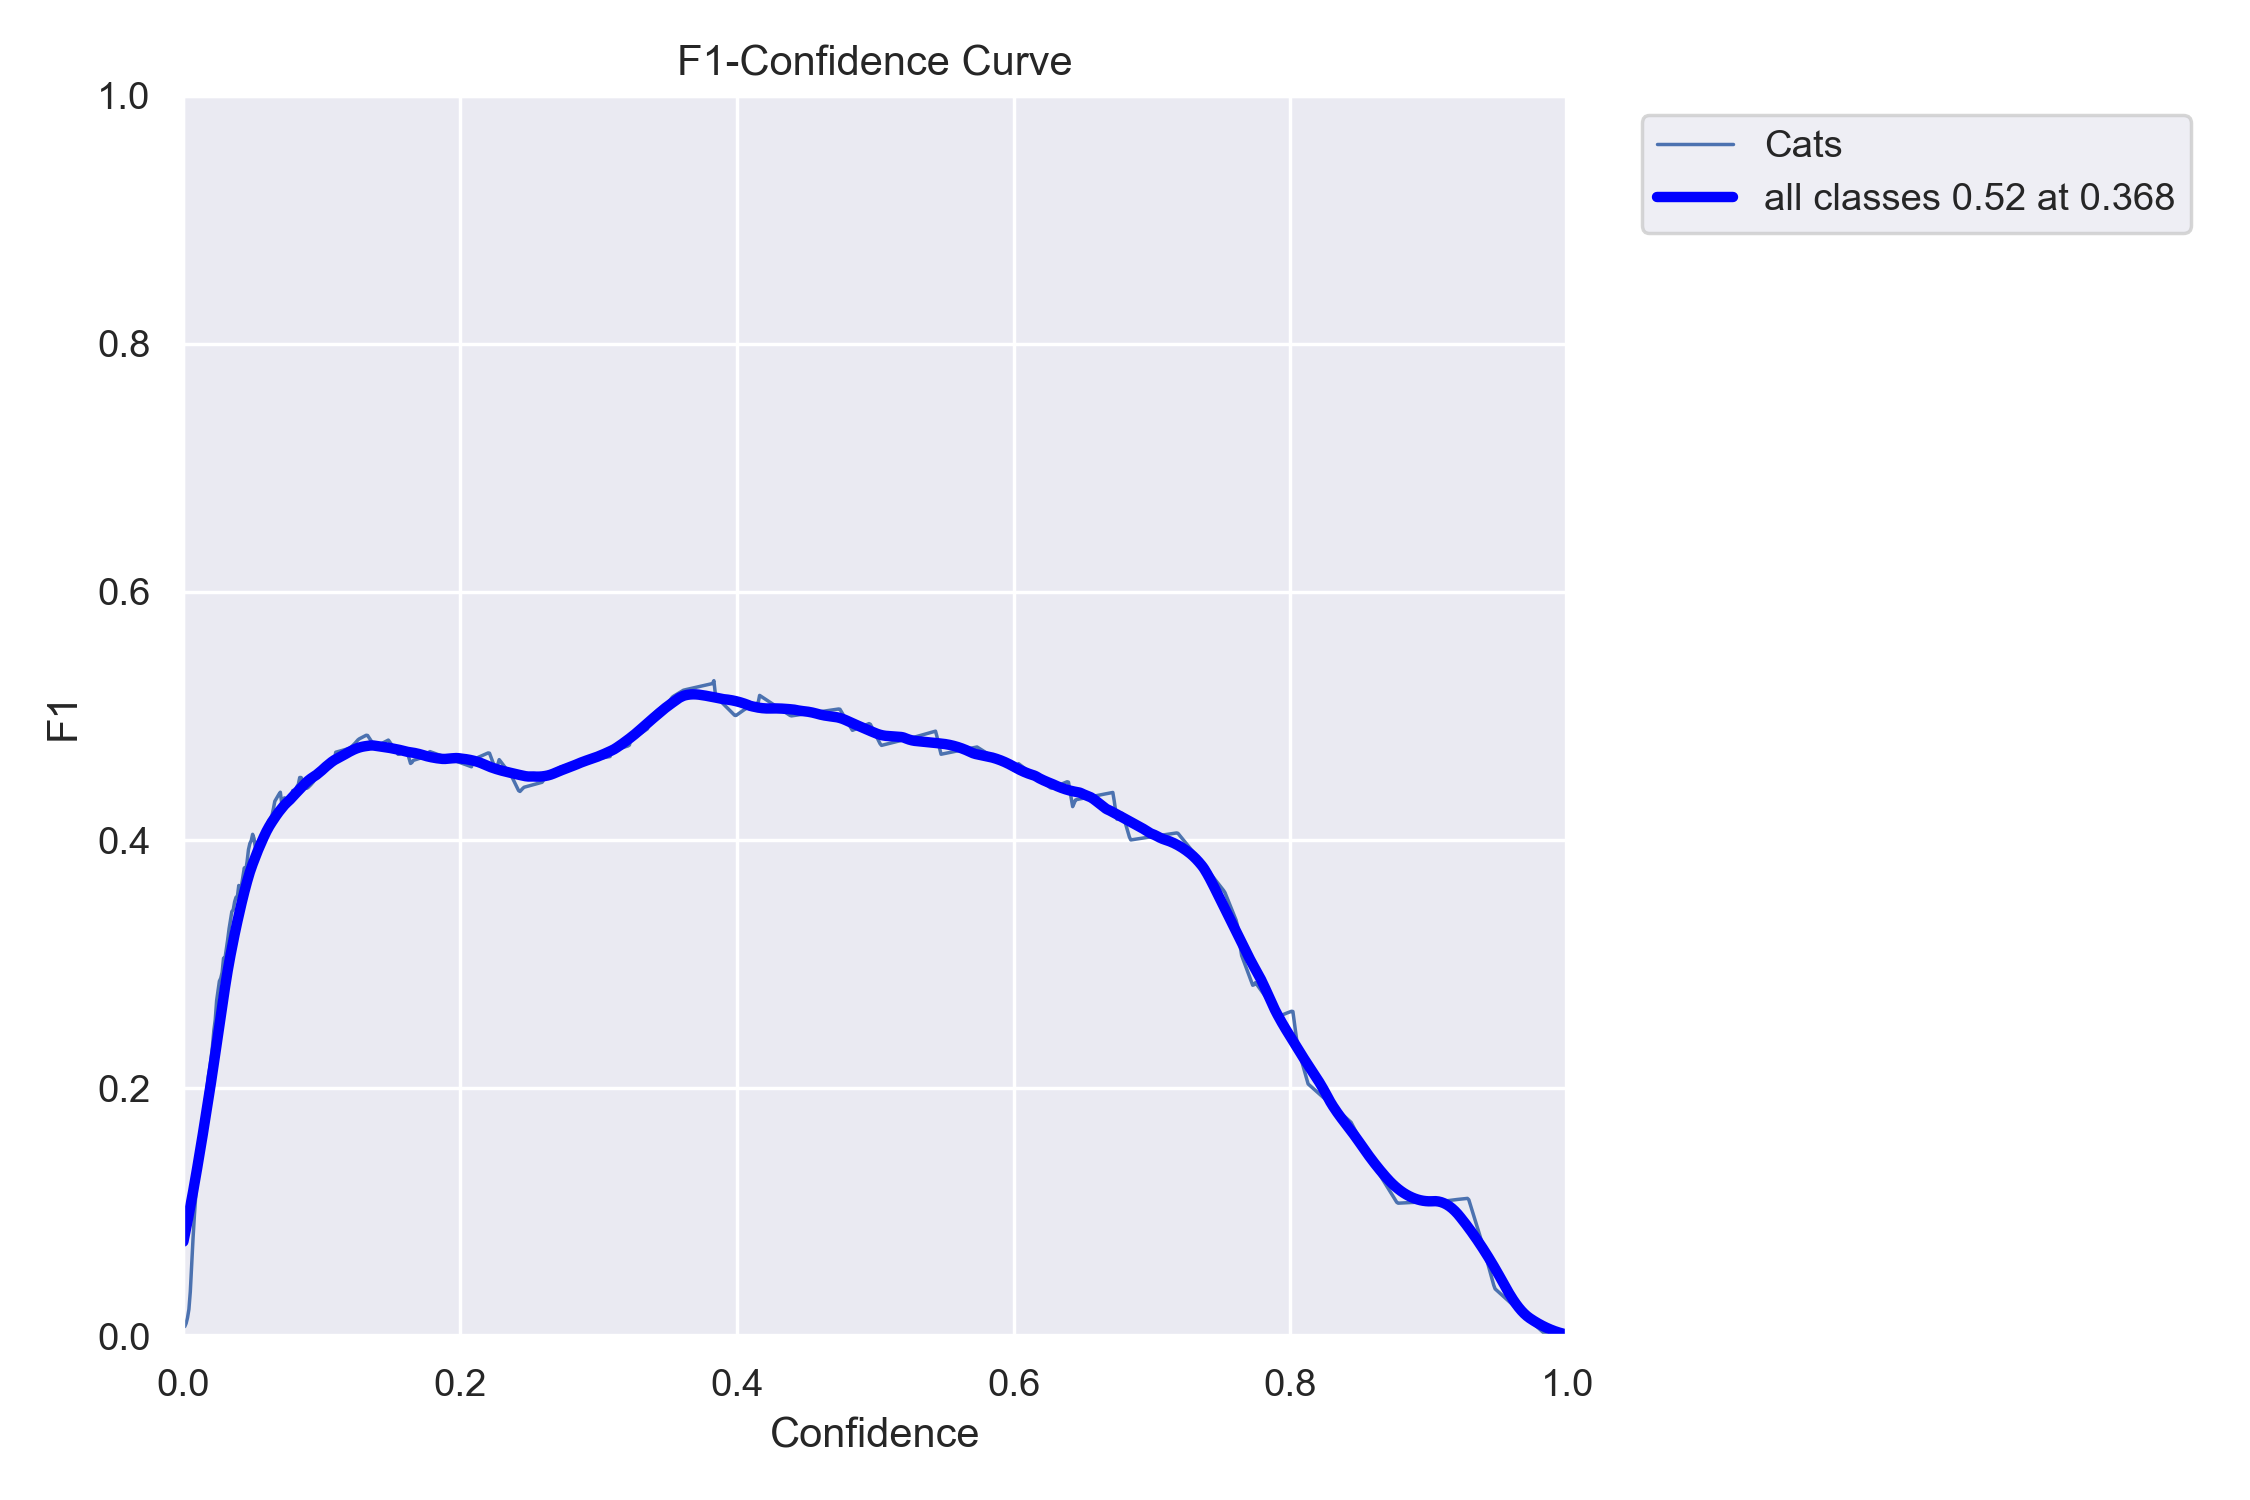

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/Users/pattphurtivilai/Desktop/yolov8


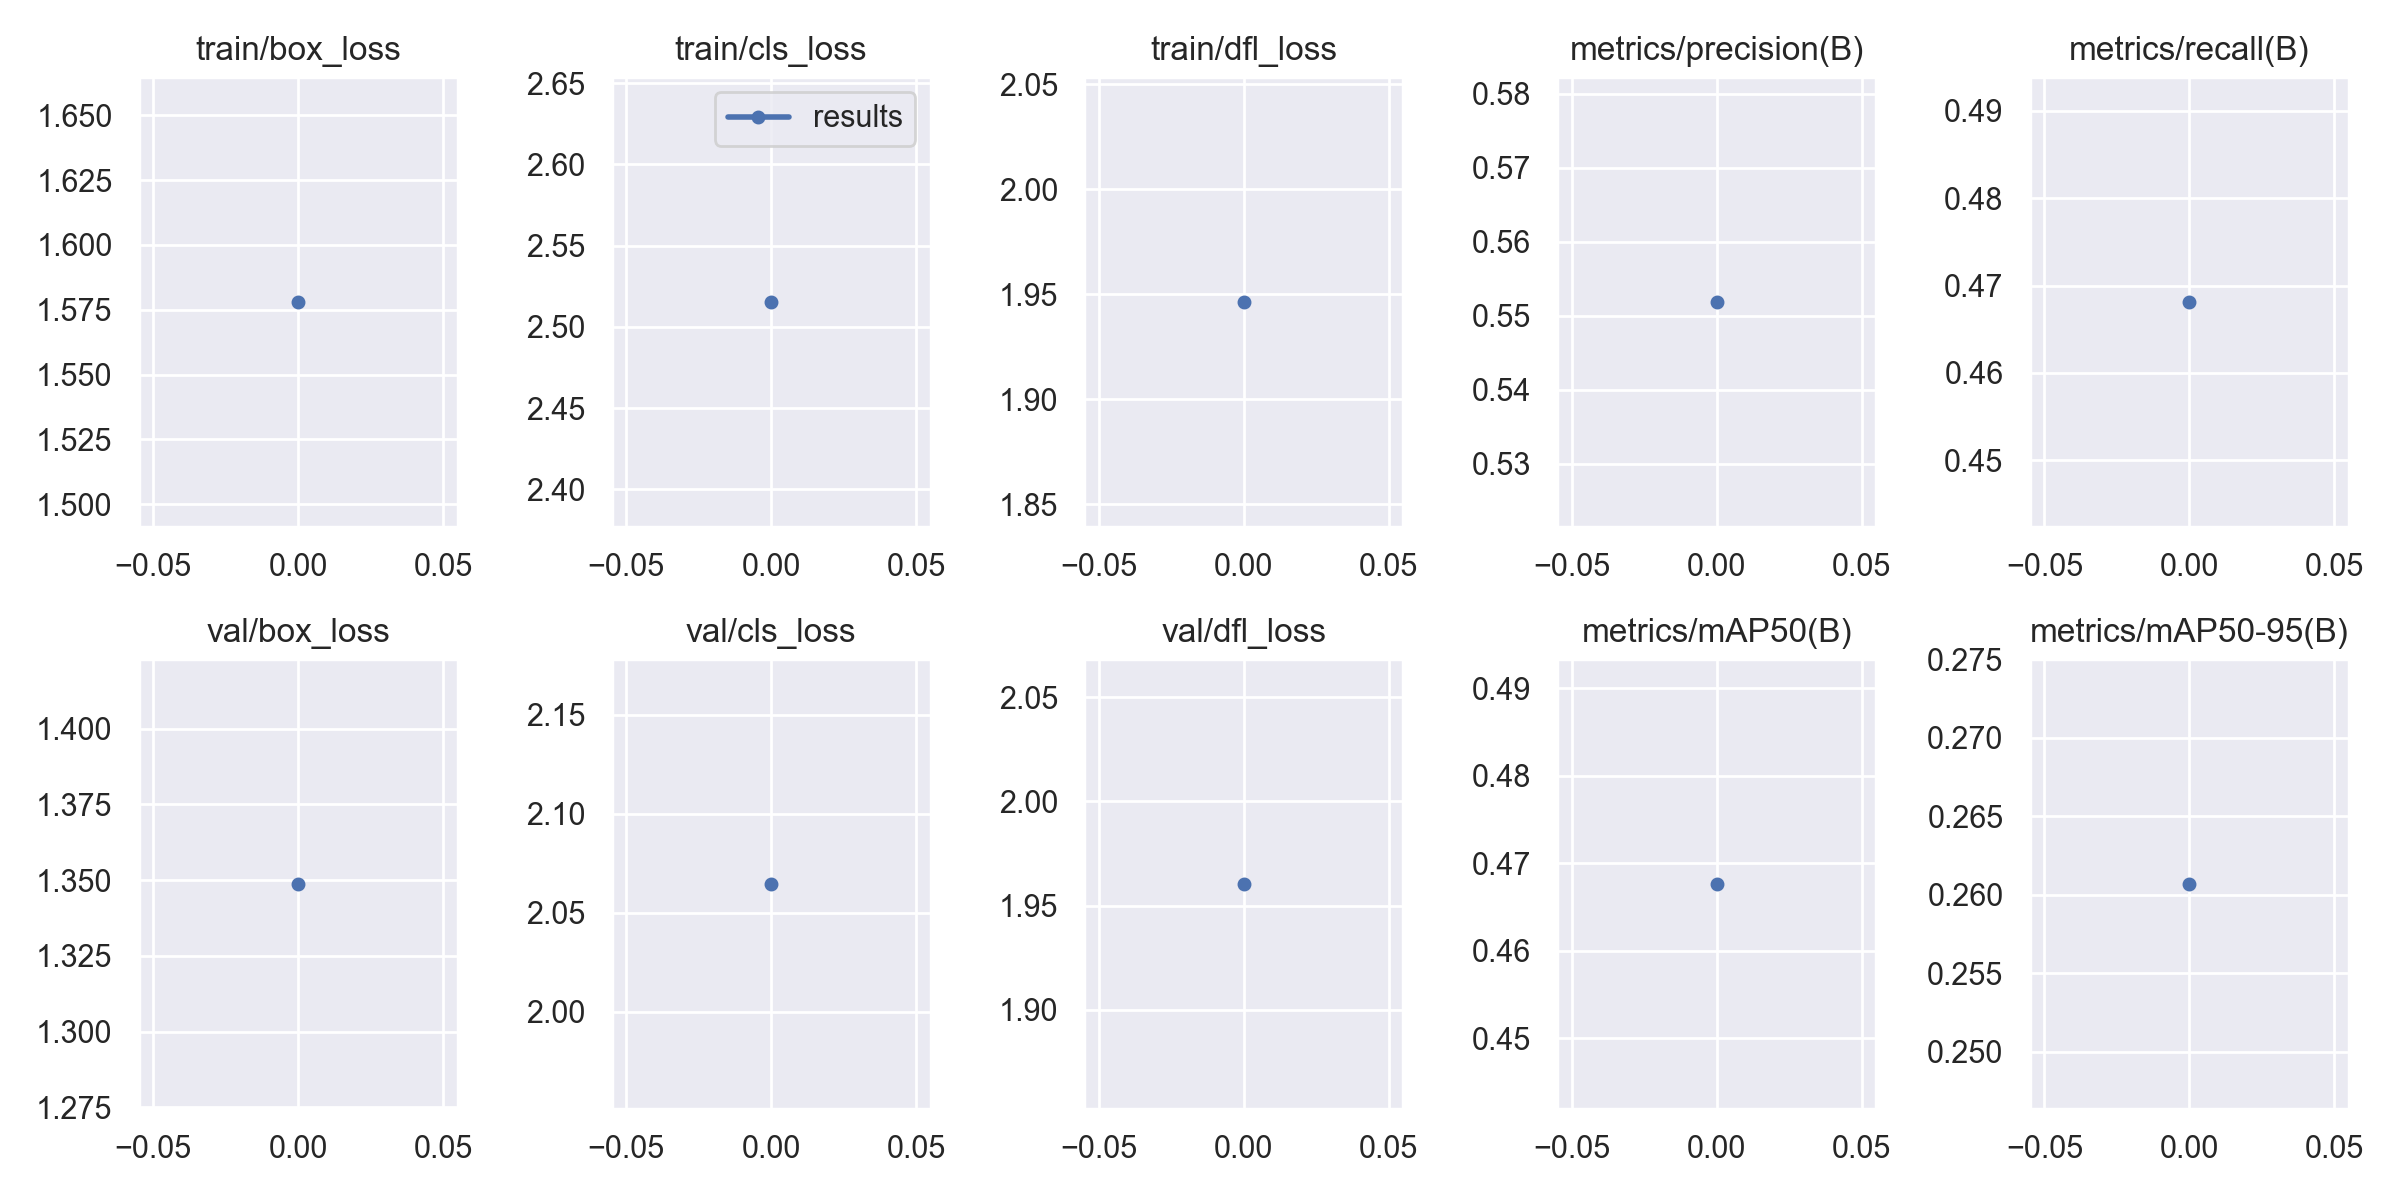

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

TEST MODEL

In [8]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/Users/pattphurtivilai/Desktop/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.0 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/vali
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         43         50      0.555      0.475      0.467      0.261
Speed: 1.1ms pre-process, 621.7ms inference, 0.0ms loss, 3.4ms post-process per image


In [9]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True

/Users/pattphurtivilai/Desktop/yolov8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.2.0 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/18 /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/test/images/0066-J3l4Zf33nfc_jpg.rf.383d5bcd3ef60f04ec23c8ffd36d69de.jpg: 640x640 1 Cats, 185.4ms
image 2/18 /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/test/images/0262-jo9XwI6B8Rs_jpg.rf.7fb55bdcd52d24ffd635e25d8aa7e4ea.jpg: 640x640 1 Cats, 206.6ms
image 3/18 /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/test/images/0340-LfHN48aCVtE_jpg.rf.8290ac3445a59d63ffae8292195dfd00.jpg: 640x640 2 Catss, 172.7ms
image 4/18 /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/test/images/0366-6B-WeK_fT8M_jpg.rf.c7b6cb31fa6fc3f788048c434d43b105.jpg: 640x640 208.9ms
image 5/18 /Users/pattphurtivilai/Desktop/yolov8/datasets/Dog_Cat-Test-1/test/images/0502-xxdTZFljIfw_jpg.rf.093904c6fedff15104711843f5832aa5.jpg: 